In [1]:
import graph
import disease
import pandas as pd
import matplotlib.pyplot as plt 
import pylab as pl
import numpy as np
import cPickle as pickle
import collections
import graph
import random
import params as pm
from params import *
%matplotlib inline

/home/students/doorjo01/research/researchEnv/local/lib/python2.7/site-packages/pandas/io/excel.py:626: UserWarning: Installed openpyxl is not supported at this time. Use >=1.6.1 and <2.0.0.
  .format(openpyxl_compat.start_ver, openpyxl_compat.stop_ver))


In [17]:


filePrefix = "otherSavedThings/DenseMeasles1--Clustered/savedGraphs--" #INSERT APPROPRIATE FILE NAME HERE
#clusteredGraphs--50.pkl
def loadInfo(pop,kind,propI):
    lstDct = {}
    lstDctPrime = {}
    r_0Lst = []
    rPrimeLst = []
    

    for j in range(50):
        for i in range(2):
            fileN = "otherSavedThings/"+pop+"Measles"+str(i+1)+"--"+kind+"/savedGraphs--"
            lst = []
            lstPrime = []
            with open(fileN+str(j+50)+".pkl","rb") as inputF:
                unPickler = pickle.Unpickler(inputF)
                while True:
                    try:
                        tg1 = unPickler.load()
                        g1 = tg1.lift()
                        #if g1.r_0 < 16 and g1.r_0>13:
                        if pop == "Rural":
                            if g1.r_0 <6.3 and g1.r_0 >5.4:
                                lst.append([g1.r_0,g1.propI])
                                lstPrime.append([g1.r_0,g1.propIPrime])
                                r_0Lst.append(g1.r_0)
                                
                        if pop == "Urban":
                            if g1.r_0 <13 and g1.r_0 >8.3:
                                lst.append([g1.r_0,g1.propI])
                                lstPrime.append([g1.r_0,g1.propIPrime])
                                r_0Lst.append(g1.r_0)                            
                        if pop == "Dense":
                            if g1.r_0 <16.3 and g1.r_0 >12.5:
                                lst.append([g1.r_0,g1.propI])
                                lstPrime.append([g1.r_0,g1.propIPrime])
                                r_0Lst.append(g1.r_0)


                    except (EOFError):#,pickle.UnpicklingError):
                        break
                if (j+50) in lstDct:
                    lstDct[j+50] += lst
                else:
                    lstDct[j+50] = lst

                if (j+50) in lstDctPrime:
                    lstDctPrime[j+50] += lstPrime
                else:
                    lstDctPrime[j+50] = lstPrime
                inputF.close()
            #print(str(i/50.0)+"% Completed")
    if propI == "t":
        return lstDct,r_0Lst
    elif propI == "s":
        return lstDctPrime,r_0Lst


In [4]:
len(r_0Lst)

9000

In [35]:
np.mean(r_0Lst)

19.244415952722974

In [6]:
print(len(lstDct.values()[2]))

180


In [3]:
def propOverFive(lst):
    acc=0
    total = len(lst)
    for i in lst:
        if i[1] >.05: #this assumes that lst[1] is propI
            acc +=1
    return float(acc)/float(total)


[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[1.0, 0.9871794871794872, 0.9937106918238994, 0.9905362776025236, 0.9770491803278688, 0.9967845659163987, 0.9904761904761905, 0.9805194805194806, 0.9842767295597484, 0.98, 0.9838187702265372, 0.9867986798679867, 0.980327868852459, 0.9703947368421053, 0.9668874172185431, 0.9646302250803859, 0.9651898734177216, 0.98125, 0.9483870967741935, 0.9639344262295082, 0.9710610932475884, 0.9803921568627451, 0.954983922829582, 0.9617834394904459, 0.9615384615384616, 0.939873417721519, 0.921875, 0.9053627760252366, 0.9230769230769231, 0.9163879598662207, 0.939297124600639, 0.8808777429467085, 0.9099378881987578, 0.8673139158576052, 0.8338762214983714, 0.8227848101265823, 0.7919254658385093, 0.7662337662337663, 0.7166123778501629, 0.6806451612903226, 0.7087378640776699, 0.5172413793103449, 0.4983388704

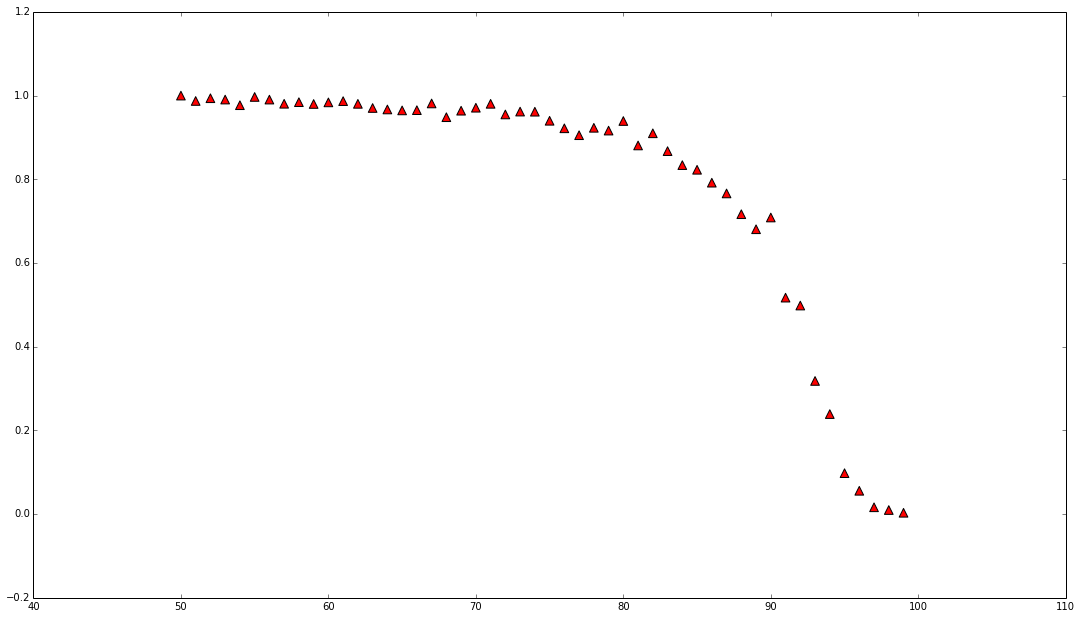

In [22]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)
lDP, rl = loadInfo("Rural", "Clustered","s")
lDP1, rl1 = loadInfo("Rural","Random","s")
lDP2, rl2 = loadInfo("Urban", "Clustered","s")
lDP3, rl3 = loadInfo("Urban","Random","s")
lDP4, rl4 = loadInfo("Dense", "Clustered","s")
lDP5, rl5 = loadInfo("Dense","Random","s")
#lDP2 = loadInfo("Rural", "Clustered","t")
def makePlot(lstDct,color="blue",shape="o",kind = "r"):
    xLst = []
    yLst = []
    for k,v in lstDct.iteritems():
        xLst.append(k)
        yLst.append(propOverFive(v))
    #if kind == "r":
        #print(yLst[33])
    #if kind == "u":
        #print(yLst[40])
    #if kind == "d":
        #print(yLst[43])
    print xLst
    print yLst
    plt.scatter(xLst,yLst,c= color,marker=shape,s=75)
#makePlot(lDP,color="pink",shape="d",kind = "r")
#makePlot(lDP1,color="lightblue",shape="d",kind="r")

#makePlot(lDP2,color="salmon",shape="o",kind="u")
#makePlot(lDP3,color="dodgerblue",shape="o",kind="u")

makePlot(lDP4,color="red",shape="^",kind="d")
#makePlot(lDP5,color="blue",shape="^",kind="d")


In [63]:
np.mean(rl1)

6.0607271324989407